In [1]:
%matplotlib inline

import numpy as np

from walker import Walker, plot_trajectory

# 1. Implement a 'from_json' factory method

We serialized a Walker for you in the file `initial.json`.

You can use the snippet
```
with open(path, 'r') as f:
    inputs = json.load(f)
```
to open and read a json file.

The `from_json` method should return an instance populated with the information in the JSON file.

In [2]:
walker = Walker.from_json("initial.json")

Just for fun, we can make sure that the walker still works as expected

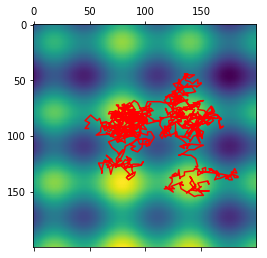

In [3]:
# Sample a next step 1000 times
i, j = 100, 50
trajectory = []
for _ in range(1000):
    i, j = walker.sample_next_step(i, j)
    trajectory.append((i, j))
plot_trajectory(trajectory, walker.context_map)

# 2. Implement a 'to_json' method

Json files are typically written by specifying a dictionary like in the following snippet
```
with open(json_path, 'w') as f:
    json.dump(serialize_dict, f)
```
For now serialize only the attributes "sigma_i", "sigma_j", and "size". Generate your json file and open it to see if it worked. What kind of name should the file have?

In [4]:
# We suggest to have the `to_json` method return the path of the file it wrote, so that it's
# easy to find it later.
walker_path = walker.to_json()

Walker serialized to walker_20220823-172023.json


# 3 (optional). Is it possible to serialize and re-instantiate the instance using your code?

At the moment, the instance that you saved cannot be loaded with the `from_json` method: the
context map is missing!

You may want to use `np.save` to save the context map as a binary matrix, and store the path of
that file inside the JSON dictionary.

Can you modify the `to_json` code so that you can save the file and load it back?

In [5]:
walker_path = walker.to_json()
walker_reloaded = Walker.from_json(walker_path)

Walker serialized to walker_20220823-172026.json


In [6]:
assert np.all(walker_reloaded.context_map == walker.context_map)
assert walker_reloaded.sigma_i == walker.sigma_i
assert walker_reloaded.sigma_j == walker.sigma_j
assert walker_reloaded.size == walker.size

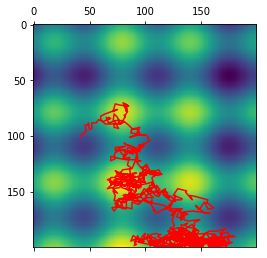

In [7]:
# Sample a next step 1000 times
i, j = 100, 50
trajectory = []
for _ in range(1000):
    i, j = walker_reloaded.sample_next_step(i, j)
    trajectory.append((i, j))
plot_trajectory(trajectory, walker_reloaded.context_map)